### Importações das bibliotecas


In [14]:
# serialização de dados
import pickle

# tratamento e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# divisão em treino e teste
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler

# métricas de performance de modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, average_precision_score, roc_auc_score, precision_score, recall_score
# importamos a árvore de decisão
from sklearn.tree import DecisionTreeClassifier
# algoritmo naive bayes
from sklearn.naive_bayes import GaussianNB

### Importando a base de dados

In [15]:
with open('EDA_df.pkl', mode='rb') as f:
    df = pickle.load(f)

### Funções que utilizaremos

In [16]:
def treinar_modelo(modelo, X: pd.DataFrame, y: pd.Series) -> str:
    # número de folds
    k = 4

    # StratifiedKFold para dados desbalanceados
    folds = StratifiedKFold(n_splits=k, shuffle=True, random_state=47)

    # listas para armazenar valores de cada fold
    precisoes = list()
    revocacoes = list()
    acuracias = list()

    # Instanciando o StandardScaler
    scaler = StandardScaler()
    
    # os index são os índices de cada fold de treino e teste
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
        print("=-"*6 + f"Fold: {k+1}" + "-="*6)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # escalonando os dados
        X_train = scaler.fit_transform(X_train) 
        X_test = scaler.transform(X_test) 
        
        # treinando o modelo
        modelo = modelo
        modelo.fit(X_train, y_train)

        # Obtendo as probabilidades das classes previstas
        #y_pred_proba = modelo.predict_proba(X_test)

        # Obtendo as previsões do modelo
        y_pred = modelo.predict(X_test)
        
        # Calculando a precisão, revocação e acurácia para o fold em questão
        precisao = precision_score(y_test, y_pred, average = "weighted")
        revocacao = recall_score(y_test, y_pred, average = "weighted")
        acuracia = accuracy_score(y_test, y_pred)
        
        # Armazenando as precisões, revocações e acurácias nas listas criadas
        precisoes.append(precisao)
        revocacoes.append(revocacao)
        acuracias.append(acuracia)
        
        # plotando a matriz de confusão de cada fold
        matriz_confusao = confusion_matrix(y_test, y_pred)
        sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

        # Configurações do gráfico
        plt.title('Matriz de confusão')
        plt.xlabel('Valor Predito')
        plt.ylabel('Valor Real')
        plt.show();
        
        # Exibindo as métricas para cada um dos folds
        print(f"Precisão: {precisao:.3f}")
        print(f"Revocação: {revocacao:.3f}")
        print(f"Acurácia: {acuracia:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays, 
    # para fazer operações matemáticas
    precisoes = np.array(precisoes)
    revocacoes = np.array(revocacoes)
    acuracias = np.array(acuracias)
    
    # Calculando a média de todas as precisões, revocações e acurácias 
    media_precisao = np.mean(precisoes)
    media_revocacao = np.mean(revocacoes)
    media_acuracia = np.mean(acuracias)

    # Calculando o desvio padrão de todas as precisões, revocações e acurácias
    std_precisao = np.std(precisoes)
    std_revocacao = np.std(revocacoes)
    std_acuracia = np.std(acuracias)

    # Exibindo a média das precisões e revocações
    print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
    print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
    print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
    
    return modelo

# Modelagem

In [17]:
cat_cols = ['posse_residencia_cliente', 'finalidade_emprestimo', 'nota_emprestimo', 'historico_inadimplencia_cliente']
label_encoder_residencia = LabelEncoder()
label_encoder_finalidade_emp = LabelEncoder()
label_encoder_nota_emprestimo = LabelEncoder()


In [18]:
# encoding de features categóricas
df.posse_residencia_cliente = label_encoder_residencia.fit_transform(df.posse_residencia_cliente)
df.finalidade_emprestimo = label_encoder_finalidade_emp.fit_transform(df.finalidade_emprestimo)
df.nota_emprestimo = label_encoder_nota_emprestimo.fit_transform(df.nota_emprestimo)

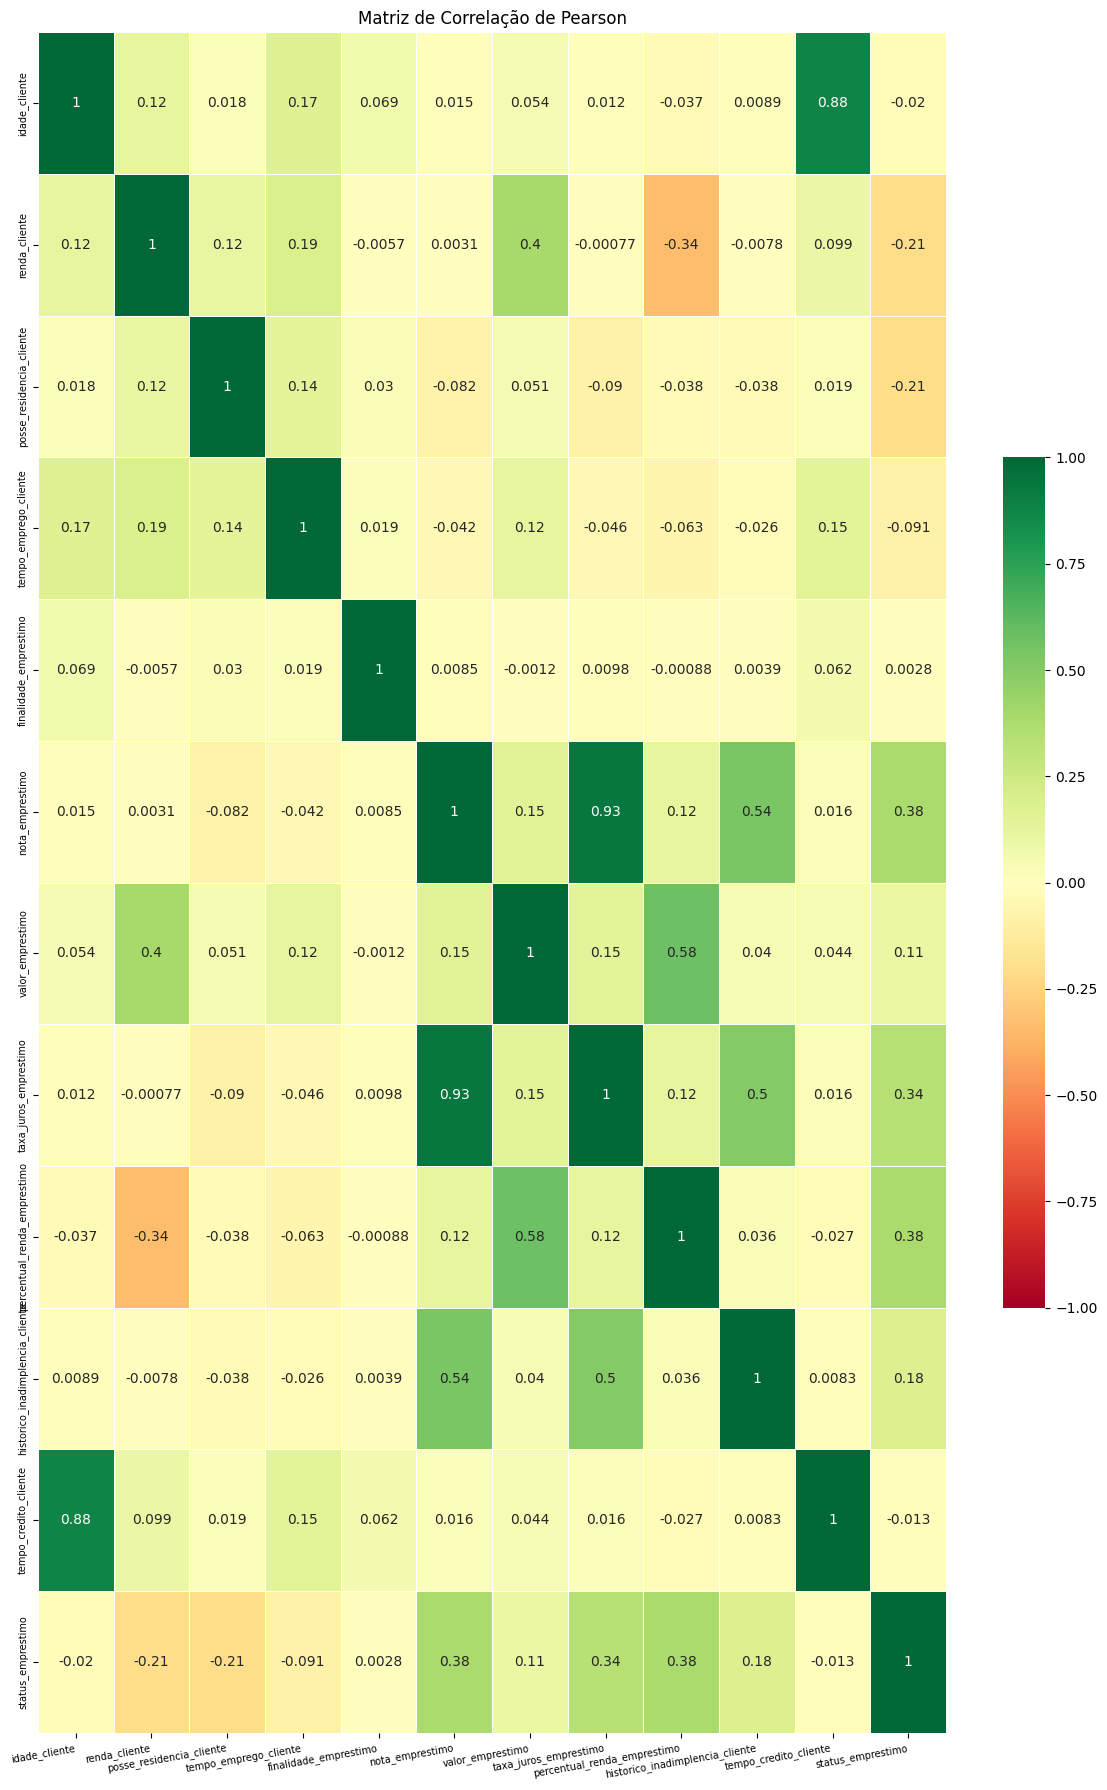

In [19]:
# Inserir Interpretação da correlação de pearson no arquivo modelagem após encoding de variáveis categóricas.
plt.figure(figsize=(12,18))
# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcular a matriz de correlação de Pearson
corr_matrix = df[numeric_cols].corr()

sns.heatmap(data=corr_matrix,annot=True, cmap='RdYlGn', vmin=-1, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=10, ha='right', fontsize=7)
plt.yticks(rotation=90, fontsize=7)
plt.title('Matriz de Correlação de Pearson')
plt.tight_layout()
plt.show();

### Testando modelos

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=


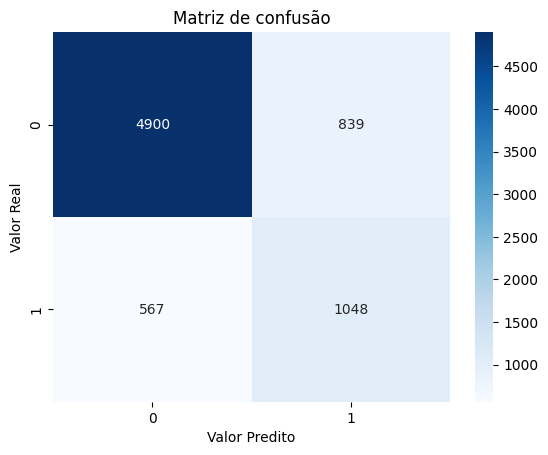

Precisão: 0.821
Revocação: 0.809
Acurácia: 0.809
=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=


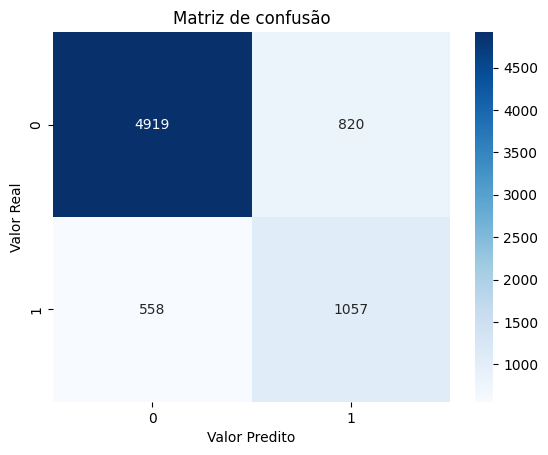

Precisão: 0.825
Revocação: 0.813
Acurácia: 0.813
=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=


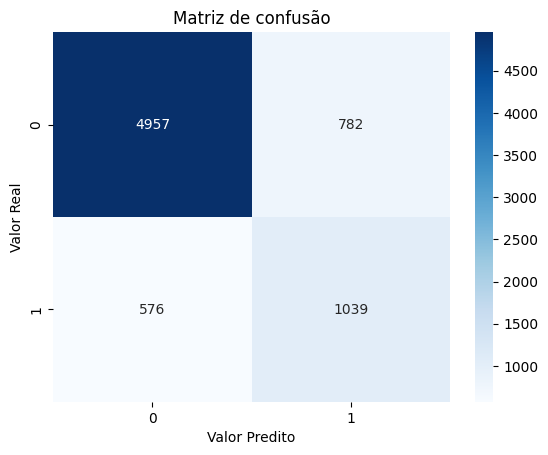

Precisão: 0.824
Revocação: 0.815
Acurácia: 0.815
=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=


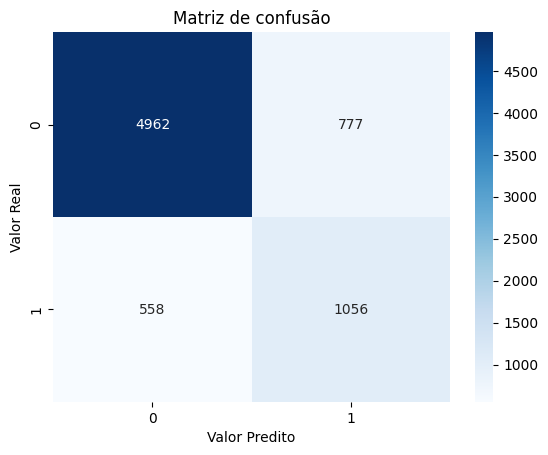

Precisão: 0.828
Revocação: 0.818
Acurácia: 0.818
Média da precisão: 0.825 +/- 0.002
Média da revocação: 0.814 +/- 0.004
Média da acurácia: 0.814 +/- 0.004


In [20]:
X = df.drop(columns = ["status_emprestimo"], axis = 1)
y = df['status_emprestimo']

modelo = GaussianNB()

modelo_treinado = treinar_modelo(modelo, X, y)

In [21]:
with open('classf_naive_bayes.pkl', mode='wb') as f:
    pickle.dump(modelo_treinado, f)

### Tunagem de Hiperparâmetros

# Análise de Negócio

## Resultado